## IMPORT LIBS

In [1]:

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
sns.set_style('darkgrid', {'legend.frameon':True})

#### IMPORT DATASETS

In [2]:
train = pd.read_csv("train.csv")
test = pd.read_csv("test.csv")
#gender = pd.read_csv("/home/fakhredine/Documents/microsoft/DB/CSV/titatic/gender_submission.csv")

## DATA EXPLORATION

### DATA PREPARATION

In [3]:
train.dtypes

PassengerId      int64
Survived         int64
Pclass           int64
Name            object
Sex             object
Age            float64
SibSp            int64
Parch            int64
Ticket          object
Fare           float64
Cabin           object
Embarked        object
dtype: object

In [4]:
#MODIF DE FAKHRE

In [5]:
# f = plt.figure(figsize=(19, 15))
# plt.matshow(train.corr(), fignum=f.number)
# plt.xticks(range(train.shape[1]), train.columns, fontsize=14, rotation=45)
# plt.yticks(range(train.shape[1]), train.columns, fontsize=14)
# cb = plt.colorbar()
# cb.ax.tick_params(labelsize=18)
# plt.title('Correlation Matrix', fontsize=16)

#### VARIABLES INFORMATIONS

In [6]:
import pandas_profiling
pandas_profiling.ProfileReport(train)

C:\Users\Utilisateur\Anaconda3\lib\site-packages\pandas_profiling\describe.py:392: FutureWarning: The join_axes-keyword is deprecated. Use .reindex or .reindex_like on the result to achieve the same functionality.
  variable_stats = pd.concat(ldesc, join_axes=pd.Index([names]), axis=1)


Number of variables,12
Number of observations,891
Total Missing (%),8.1%
Total size in memory,83.7 KiB
Average record size in memory,96.1 B
Numeric,6
Categorical,4
Boolean,1
Date,0
Text (Unique),1
Rejected,0


In [7]:
fig, ax = plt.subplots(figsize=(6,6))  
corr = train.corr()
ax =sns.heatmap(corr, annot = True, vmin=-1, vmax=1, center= 0, cmap= 'coolwarm')
plt.tight_layout()
plt.show()

C:\Users\Utilisateur\Anaconda3\lib\site-packages\ipykernel_launcher.py:5: UserWarning: Matplotlib is currently using agg, which is a non-GUI backend, so cannot show the figure.
  """


## DATA CLEANING

In [8]:
train = pd.read_csv("train.csv")

def cleaning(data):
    # Colonnes sans intérêt
    data = data.drop(["PassengerId", "Name", 'SibSp', 'Parch', "Cabin", "Ticket"], axis=1)
    # Création de la colonne Female (0,1) pour remplacer 'Sex'
    data['Female']=list(map(lambda x: int(x=='female'), data['Sex']))
    data = data.drop(["Sex"], axis=1)
    # Colonnes ayant des Nan et suppression des lignes correspondantes
    print('Les colonnes concernées sont:',data.columns[data.isna().any()].tolist()) 
    data = data.dropna(axis=0, how='any', thresh=None, subset=None, inplace=False)
    # embarked transcrite sur le code touche clavier
    data['Embarked'] = [ord(i) for i in data['Embarked']] # compris entre 65 et 90
         # chr(code) pour retranscription
    return data
c_train = cleaning(train)
c_test = cleaning(test)
c_train

Les colonnes concernées sont: ['Age', 'Embarked']
Les colonnes concernées sont: ['Age', 'Fare']


,Survived,Pclass,Age,Fare,Embarked,Female
0,0,3,22.0,7.2500,83,0
1,1,1,38.0,71.2833,67,1
2,1,3,26.0,7.9250,83,1
3,1,1,35.0,53.1000,83,1
4,0,3,35.0,8.0500,83,0
...,...,...,...,...,...,...
885,0,3,39.0,29.1250,81,1
886,0,2,27.0,13.0000,83,0
887,1,1,19.0,30.0000,83,1
889,1,1,26.0,30.0000,67,0


In [9]:
c_train.describe()

,Survived,Pclass,Age,Fare,Embarked,Female
count,712.000000,712.000000,712.000000,712.000000,712.000000,712.000000
mean,0.404494,2.240169,29.642093,34.567251,80.000000,0.363764
std,0.491139,0.836854,14.492933,52.938648,6.160534,0.481420
min,0.000000,1.000000,0.420000,0.000000,67.000000,0.000000
25%,0.000000,1.000000,20.000000,8.050000,83.000000,0.000000
50%,0.000000,2.000000,28.000000,15.645850,83.000000,0.000000
75%,1.000000,3.000000,38.000000,33.000000,83.000000,1.000000
max,1.000000,3.000000,80.000000,512.329200,83.000000,1.000000


# DATA EXPLORATION

#### Pour chacune des variables suivantes, créer un ou plusieurs diagrammes qui la résume au mieux.

In [10]:
# Etude des liens entre deux colonnes et la répartion des valeurs dans une colonne
sns.pairplot(c_train, palette="husl")

In [11]:
'''
Pour le(s)'entrée(s) C, les personnes le la première classe sont les plus concernées
La troisième classe se situe sur toutes les entrées, majoritaire sur les entrées S et omniprésente sur les entrées Q.
'''
# Répartion des différentes classes par entrées. CAHNGER NOMS ABSCISSES
pd.crosstab(c_train['Embarked'], c_train['Pclass']).plot.bar()
#c_train = c_train.drop('Embarked',axis=1)

In [12]:
# Les tarifs du voyage (nombre de persones par tarifs non pris en compte)
sns.distplot(c_train['Fare'])
'''
Les tarifs du voyage sont majoritairements tournés entre 0 et 100.
(50% ont un coût situé entre 8 et 33, cf c_train.describe())
'''

'\nLes tarifs du voyage sont majoritairements tournés entre 0 et 100.\n(50% ont un coût situé entre 8 et 33, cf c_train.describe())\n'

In [13]:
# répartions entre les tarifs et les âges
sns.jointplot('Age','Fare', data=c_train, kind='kde')
'''
La majorité des femmes ont entre 15 et 40 ans.
Il est etonnant que les femmes ayant moins de 10 ans soient sur un tarif plus élévé que la moyenne des tarifs pour les femmes agées entre 15 et 45 ans
'''

'\nLa majorité des femmes ont entre 15 et 40 ans.\nIl est etonnant que les femmes ayant moins de 10 ans soient sur un tarif plus élévé que la moyenne des tarifs pour les femmes agées entre 15 et 45 ans\n'

In [14]:
# Répartion des personnes par classes et age (representation 1/2)
#sns.carplot(x='Pclass',y='Age', data=c_train, hue='Female')

In [15]:
# Répartion des personnes par classes et age (representation 2/2)
sns.boxplot(x='Pclass',y='Age', data=c_train, hue='Female')
'''
On constate que plus l'age est important, plus grandes sont les chances d'être dans une classe supérieure.
Un homme a trés lègèrement plus de chances de se situé sur une classe supérieure qu'une femme.
'''

"\nOn constate que plus l'age est important, plus grandes sont les chances d'être dans une classe supérieure.\nUn homme a trés lègèrement plus de chances de se situé sur une classe supérieure qu'une femme.\n"

In [16]:
# Nombre de personnes par age
plt.xlabel('Age')
plt.ylabel('Quantité')
rien = plt.hist(train['Age'].ravel(), bins=80) 
'''
On contate qu'il y a plus de personnes autour de 20-35 ans dans le Titanic. Ce qui est parfaitement valide.
Cependant, on trouve moins d'enfants autour de 10 ans que d'enfants issus de la naissance.
'''

C:\Users\Utilisateur\Anaconda3\lib\site-packages\numpy\lib\histograms.py:824: RuntimeWarning: invalid value encountered in greater_equal
  keep = (tmp_a >= first_edge)
C:\Users\Utilisateur\Anaconda3\lib\site-packages\numpy\lib\histograms.py:825: RuntimeWarning: invalid value encountered in less_equal
  keep &= (tmp_a <= last_edge)


"\nOn contate qu'il y a plus de personnes autour de 20-35 ans dans le Titanic. Ce qui est parfaitement valide.\nCependant, on trouve moins d'enfants autour de 10 ans que d'enfants issus de la naissance.\n"

In [17]:
# Répartition des classes suivant le coût des tickets et l'âge des personnes
f = lambda z: int(z==1)*'r' + int(z==2)*'y' + int(z==3)*'b'
X, Y, Z = train['Age'], train['Fare'], train['Pclass']
plt.scatter(X, Y, alpha=1, s=5, facecolor=list(map(f,Z)))
plt.xlabel('Age')
plt.ylabel('Fare')
'''
On retrouve des constatations similaires à d'autres représentation montrants des liens entre la colonne Age et la colonne Pclass, 
elle-même en lien avec la colonne Fare.
'''

"\nOn retrouve des constatations similaires à d'autres représentation montrants des liens entre la colonne Age et la colonne Pclass, \nelle-même en lien avec la colonne Fare.\n"

In [18]:
grid = sns.FacetGrid(c_train, col='Survived', row='Pclass', size=2.5, aspect=1)
grid.map(plt.hist, 'Age', alpha=.5, bins=c_train.shape[1])
grid.add_legend()
'''
Les lignes correspondent aux classes et les colonnes à la survie.
Majoritairement, les personnes de la classe 3 sont décédées.
Pour la première classe, ils ont eus de la chance
'''

C:\Users\Utilisateur\Anaconda3\lib\site-packages\seaborn\axisgrid.py:230: UserWarning: The `size` paramter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


'\nLes lignes correspondent aux classes et les colonnes à la survie.\nMajoritairement, les personnes de la classe 3 sont décédées.\nPour la première classe, ils ont eus de la chance\n'

In [19]:
# survie selon l'age, le prix et le sexe
g = sns.FacetGrid(c_train, hue="Survived", col="Female", margin_titles=True,
                palette="Set1",hue_kws=dict(marker=["^", "v"]))
g.map(plt.scatter, "Fare", "Age",edgecolor="w").add_legend()
plt.subplots_adjust(top=0.8)
g.fig.suptitle('Survival by Gender , Age and Fare');
'''
Les morts sont plus importanes chez les hommes que chez les femmes.
Il y a moins de survivants que de morts. En admettant qu'il y a autant de femmes que d'hommes sur le bateau, les femmes ont plus de chances de survivre
'''

"\nLes morts sont plus importanes chez les hommes que chez les femmes.\nIl y a moins de survivants que de morts. En admettant qu'il y a autant de femmes que d'hommes sur le bateau, les femmes ont plus de chances de survivre\n"

Il y a moins de survivants que de morts.
En admettant qu'il y a autant de femmes que d'hommes sur le bateau, les femmes ont plus de chances de survivre

In [20]:
# Nombre de suivivants ou non au naufrage
print("Survived :" ,len(train[train['Survived'] == 1]))
print("Not Survived :",len(train[train['Survived'] == 0]))
'''
Sur les données étudiées, on relève 342 survivants et 549 morts
'''

Survived : 342
Not Survived : 549


'\nSur les données étudiées, on relève 342 survivants et 549 morts\n'

In [21]:
# Répartion des personnes mortes ou survécues suivant leurs âges. A METTRE EN DESSOUS DE L AUTRE
survived = train[train["Survived"] == 1]
died = train[train["Survived"] == 0]
survived["Age"].plot.hist(alpha=0.5,color='red',bins=50)
died["Age"].plot.hist(alpha=0.5,color='blue',bins=50)
plt.legend(['Survived','Died'])
plt.show()

C:\Users\Utilisateur\Anaconda3\lib\site-packages\ipykernel_launcher.py:7: UserWarning: Matplotlib is currently using agg, which is a non-GUI backend, so cannot show the figure.
  import sys


"\nIl n'y a de vue aucun lien entre le sexe et Pclass.\nLes femmes ont plus de chances qu'un homme de survivre face au défi conséquent de la situation étudiée.\nLes hommes ont autour de 4 ans de plus en moyenne que les femmes.\n"

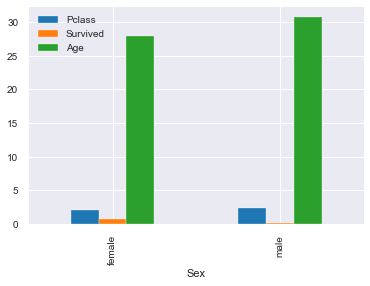

In [35]:
%matplotlib inline
# Catégories associées aux âges
train[['Sex','Pclass','Survived','Age']].groupby(['Sex']).mean().plot.bar()

'''
Il n'y a de vue aucun lien entre le sexe et Pclass.
Les femmes ont plus de chances qu'un homme de survivre face au défi conséquent de la situation étudiée.
Les hommes ont autour de 4 ans de plus en moyenne que les femmes.
'''

In [23]:
# Caractéristiques des personnes dans les différentes classes
train[['Sex','Pclass','Survived','Age']].groupby(['Pclass']).mean().plot.bar()
'''
Des liens déjà rencontrés existent entre la classe et, Survived ou Age
'''

'\nDes liens déjà rencontrés existent entre la classe et, Survived ou Age\n'

In [24]:
# Positionnement des enfants dans les différentes classes
print(train[train['Age']<18]['Pclass'].value_counts()/len(train[train['Age']<18]))
'''
70% des enfants sont situés dans la troisième classe, pourquoi leur payer la première classe? Ce n'est pas eux qui payent!
'''

3    0.690265
2    0.203540
1    0.106195
Name: Pclass, dtype: float64


"\n70% des enfants sont situés dans la troisième classe, pourquoi leur payer la première classe? Ce n'est pas eux qui payent!\n"

# STATICTIC TEST

Test d’hypothèse pour savoir si oui ou non, les enfants ont été privilégiés lors du naufrage.

In [25]:
import scipy.stats as stats

def fisherstats():
    return stats.fisher_exact([[train["Pclass"][0], train["Sex"][0]], [train["Pclass"][0], train['Age'][0]]])
    
oddsratio, pvalue = fisherstats()

ValueError: invalid literal for int() with base 10: 'male'

In [ ]:
print(pvalue)

Test d’hypothèse pour vérifier si oui ou non, les femmes ont été privilégiées lors du naufrage.

# CREATING MODEL

#### TEST NUMERO 1

C:\Users\Utilisateur\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


y_train:
 [0 1 1 1 0 0 0 1 1 1]
y_pred_prob[:,1] :
 [0.11535546 0.89335513 0.55817783 0.90448527 0.07984574 0.32147042
 0.20050192 0.55185626 0.84520727 0.71939449]


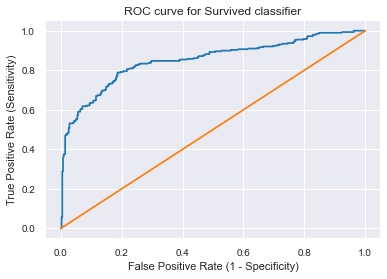

0.8501989976415094
0.7963483146067416


interactive(children=(FloatSlider(value=0.5, description='x', max=1.0, step=0.01), Output()), _dom_classes=('w…

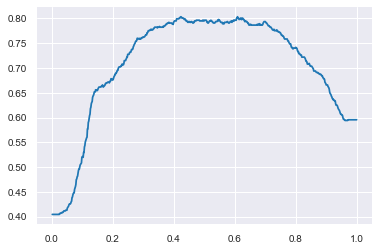

Les meilleures valeurs à prendre pour le soeuil sont dans [0.42275280898876405, 0.6081460674157303]


In [39]:
%matplotlib inline
sns.set_style('darkgrid', {'legend.frameon':True})

# Création des dataFrames utiles pour prédire Survived
X_train = c_train.drop('Survived',axis=1)
y_train = c_train['Survived']
X_test = c_test

# Entrainnement du modèle de regression logistique 
from sklearn.linear_model import LogisticRegression # OU LinearRegression
logreg = LogisticRegression() 
logreg.fit(X_train, y_train)

# Etude des différences entre y_train et y_pred_prob
y_pred_prob = logreg.predict_proba(X_train)
print('y_train:\n', y_train.values[:10])
print('y_pred_prob[:,1] :\n',y_pred_prob[:,1].T[:10])

# ROC curve associée à notre représentation
from sklearn import metrics
fpr, tpr, thresholds = metrics.roc_curve(y_train, y_pred_prob[:,1])
plt.plot(fpr, tpr, [0,1],[0,1])
plt.xlim([-0.05, 1.05]); plt.ylim([-0.05, 1.05])
plt.title('ROC curve for Survived classifier')
plt.xlabel('False Positive Rate (1 - Specificity)'); plt.ylabel('True Positive Rate (Sensitivity)')
plt.grid(True)
plt.show()

# AUC score
print(metrics.roc_auc_score(y_train, y_pred_prob[:,1]))
# Use score method to get accuracy of model ()
print(logreg.score(X_train, y_train))

# Etude de la valeur soeuil à prendre
import ipywidgets as widgets
from sklearn.preprocessing import binarize
def tests(x):    
    # predistions suivant la valeur soeuil prise
    y_pred_class = binarize([y_pred_prob[:,1]], x).T
    # print the first 25 true and predicted responses
    print('True:', y_train.values.T[:10])
    print('Pred:', y_pred_class.T[0,:10])
    # confusion matrix
    conf_matrix = metrics.confusion_matrix(y_train, y_pred_class)
    print(conf_matrix)
    # calculate accuracy
    print(metrics.accuracy_score(y_train, y_pred_class))
    print(metrics.roc_auc_score(y_train, y_pred_prob[:,1]))
    
widgets.interact(tests, x=widgets.FloatSlider(min=0, max=1, step=0.01, value=0.5))

# Etude de la meilleur valeur soeuil à prendre
def f(x):
    # predict diabetes if the predicted probability is greater than x
    y_pred_class = binarize([y_pred_prob[:,1]], x).T
    # calculate accuracy 
    return metrics.accuracy_score(y_train, y_pred_class) 

x = [i/len(y_pred_prob[:,1]) for i in range(1,len(y_pred_prob[:,1]))]
y = [f(i) for i in x]
plt.plot(x, y)
plt.show()
plt.close()

points = dict(zip(x, y))
val_soeuil = {x  for x, y in points.items() if y == max(points.values())}
print(f"Les meilleures valeurs à prendre pour le soeuil sont dans [{min(val_soeuil)}, {max(val_soeuil)}]")

#### TEST NUMERO 2

Le meilleur nombre de voisins est de  1
Le score obtenu sur le test est de: 0.9831460674157303


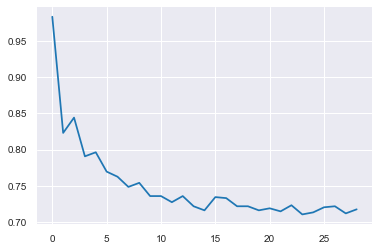

In [37]:
%matplotlib inline
sns.set_style('darkgrid', {'legend.frameon':True})

# Création des dataFrames utiles pour prédire Survived
X = c_train.drop('Survived',axis=1)
y = c_train['Survived']

score = []
best_k = 1
best_score = 0
from sklearn.neighbors import KNeighborsClassifier
for k in range(best_k, 30):
    model = KNeighborsClassifier(n_neighbors=k)
    model.fit(X, y)
    score.append(model.score(X,y))
    if best_score < model.score(X,y):
        best_k = k
        best_score = model.score(X,y) 
print('Le meilleur nombre de voisins est de ',best_k)
plt.plot(score)

# Application du meilleur modele sur le fichier train
model = KNeighborsClassifier(n_neighbors=best_k)
model.fit(X,y)
print("Le score obtenu sur le test est de:", model.score(X,y))

#### TEST NUMERO 3

In [30]:
%matplotlib inline
sns.set_style('darkgrid', {'legend.frameon':True})

# Création des dataFrames utiles pour prédire Survived
X_train = c_train.drop('Survived',axis=1)
y_train = c_train['Survived']
#X_test = c_test

#Train the model
from sklearn.linear_model import LogisticRegression
model = LogisticRegression(solver='lbfgs',multi_class='auto',penalty='none')
model.fit(X_train, y_train) #Training the model

#Test the model
y_train_pred = model.predict(X_train)

# evaluation du modele
from sklearn.metrics import classification_report
print(classification_report(y_train, y_train_pred))
from sklearn.metrics import accuracy_score
print(accuracy_score(y_train, y_train_pred)) 
from sklearn.metrics import confusion_matrix
print(confusion_matrix(y_train, y_train_pred))

              precision    recall  f1-score   support

           0       0.82      0.84      0.83       424
           1       0.76      0.72      0.74       288

    accuracy                           0.79       712
   macro avg       0.79      0.78      0.78       712
weighted avg       0.79      0.79      0.79       712

0.7935393258426966
[[358  66]
 [ 81 207]]


#### TEST NUMERO 4

In [40]:
valid_test = pd.DataFrame(X_test, columns = train.columns)
valid_test['predicted'] = logreg.predict(X_test)

THRESHOLD = 0.5
preds = np.where(logreg.predict_proba(X_train)[:,1] > THRESHOLD, 1, 0)

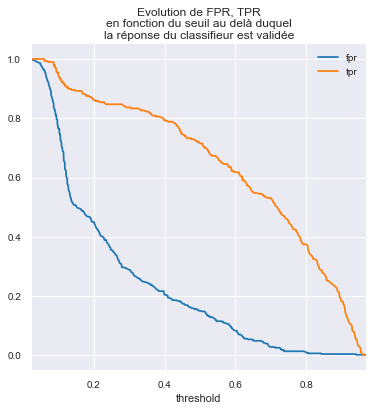

In [41]:
from sklearn.metrics import roc_auc_score, roc_curve, auc
proba = logreg.predict_proba(X_train)[:, 1]
fpr1, tpr1, thresholds1 = roc_curve(y_train, proba, pos_label=logreg.classes_[1], drop_intermediate=False)

tp = pd.DataFrame(dict(fpr=fpr1, tpr=tpr1, threshold=thresholds1))
tp.drop(0, axis=0, inplace=True) #suppression du 1er seuil fixé arbitrairement à 2

ax = tp.plot(x="threshold", y=['fpr', 'tpr'], figsize=(6,6))
ax.set_title("Evolution de FPR, TPR\nen fonction du seuil au delà duquel\n" + 
             "la réponse du classifieur est validée");

In [46]:
from sklearn.metrics import roc_auc_score, roc_curve, auc
proba = logreg.predict_proba(X_train)[:, 0]
fpr0, tpr0, thresholds0 = roc_curve(y_train, proba, pos_label=logreg.classes_[0], drop_intermediate=False)
thresholds0.shape

(660,)

0.8501989976415094


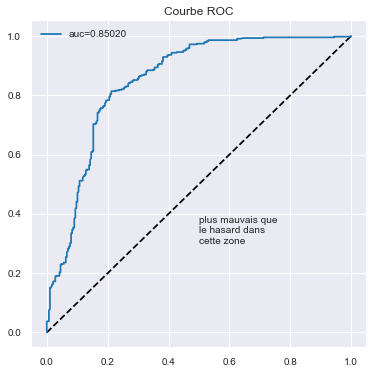

In [47]:
fig, ax = plt.subplots(1, 1, figsize=(6,6))
ax.plot([0, 1], [0, 1], 'k--')
aucf = auc(fpr0, tpr0)
print(aucf)
ax.plot(fpr0, tpr0, label='auc=%1.5f' % aucf)
ax.set_title('Courbe ROC')
ax.text(0.5, 0.3, "plus mauvais que\nle hasard dans\ncette zone")
ax.legend()

In [49]:
# Matrice de confusion
from sklearn.metrics import confusion_matrix

cm = pd.DataFrame(confusion_matrix(y_train, logreg.predict(X_train)), columns=['Survived', 'Not Survived'])
cm.index = ['Survived', 'Not Survived']
cm

,Survived,Not Survived
Survived,361,63
Not Survived,82,206


# PREDICTION ON TEST FILE

#### Mise en application du modele 1

#### Mise en application du modele 2

#### Mise en application du modele 3

#### Mise en application du modele 4